## Reproduce PySM 2 small scales using polspice
tags: [pysm,healpy,cosmology]

The purpose of this notebook is to reproduce the analysis described in the [PySM 2 paper](https://arxiv.org/pdf/1608.02841.pdf) to prepare the input templates used in the Galactic dust and synchrotron models.
In summary we take input template maps from Planck or other sources, smooth them to remove noise and add small scale gaussian fluctuations.

In [25]:
import os
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
%matplotlib inline

In [26]:
hp.disable_warnings()

In [27]:
plt.style.use("seaborn-talk")

In [28]:
import pysm3 as pysm
import pysm3.units as u

In [29]:
nside = 512
lmax = 3 * nside - 1

## Masks

For synchrotron we use the WMAP polarization analysis mask

In [30]:
wmap_mask_filename = "wmap_polarization_analysis_mask_r9_9yr_v5.fits"

In [31]:
if not os.path.exists(wmap_mask_filename):
    !wget https://lambda.gsfc.nasa.gov/data/map/dr5/ancillary/masks/$wmap_mask_filename

In [32]:
fits.open(wmap_mask_filename)[1].header

XTENSION= 'BINTABLE'           /binary table extension                          
BITPIX  =                    8 /8-bit bytes                                     
NAXIS   =                    2 /2-dimensional binary table                      
NAXIS1  =                    8 /width of table in bytes                         
NAXIS2  =              3145728 /number of rows in table                         
PCOUNT  =                    0 /size of special data area                       
GCOUNT  =                    1 /one data group (required keyword)               
TFIELDS =                    2 /number of fields in each row                    
TTYPE1  = 'TEMPERATURE'        /label for field 1                               
TFORM1  = 'E       '           /data format of field: 4-byte REAL               
TUNIT1  = 'mK      '           /physical unit of field 1                        
TTYPE2  = 'N_OBS   '           /label for field 2                               
TFORM2  = 'E       '        

In [33]:
wmap_mask = hp.read_map(wmap_mask_filename,0)

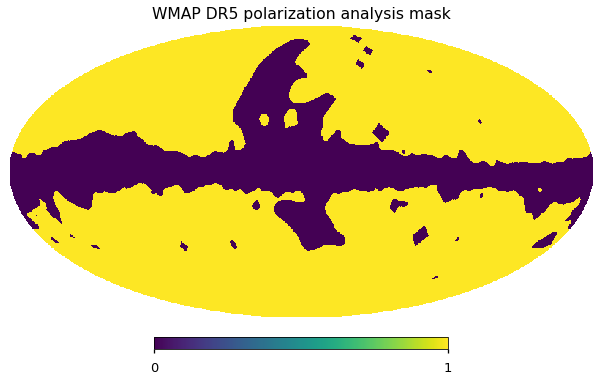

In [34]:
hp.mollview(wmap_mask, title="WMAP DR5 polarization analysis mask")

In [35]:
wmap_mask.sum()/len(wmap_mask)

0.7315705617268881

In [36]:
total_mask = hp.ud_grade(wmap_mask, nside)

In [37]:
hp.write_map("total_mask.fits", total_mask.astype(np.int), overwrite=True)

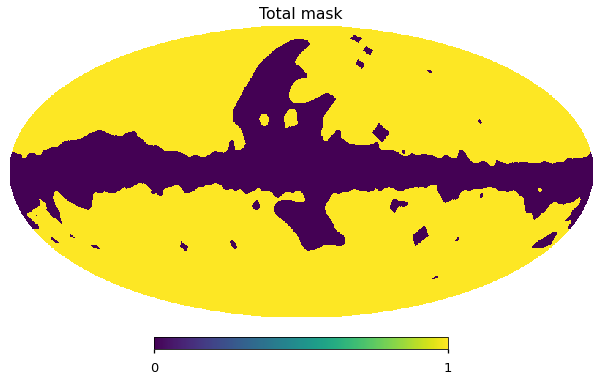

In [38]:
hp.mollview(total_mask, title="Total mask")

## Synchrotron model

### Spectral index

As in the nominal Planck Sky Model v1.7.8 simulations,
we use the spectral index map from ‘Model 4’ of [MivilleDeschenes et al. (2008)](https://arxiv.org/abs/0802.3345), calculated from a combination of
Haslam and WMAP 23 GHz polarization data using a model
of the Galactic magnetic field.

In [39]:
pysm2_beta = hp.read_map("https://portal.nersc.gov/project/cmb/pysm-data/pysm_2/synch_beta.fits")

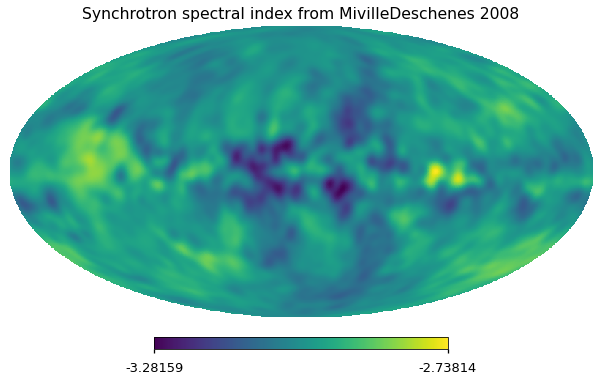

In [40]:
hp.mollview(pysm2_beta, title="Synchrotron spectral index from MivilleDeschenes 2008")

In [41]:
hp.npix2nside(len(pysm2_beta))

512

## Synchrotron templates

The nominal PySM model assumes that the synchrotron intensity is a scaling of the degree-scale-smoothed 408 MHz
Haslam map (Haslam et al. 1981; Haslam et al. 1982), reprocessed by [Remazeilles et al. (2014)](https://arxiv.org/abs/1411.3628v1). It models the polarization as a scaling of the WMAP 9-year 23 GHz Q and U
maps (Bennett et al. 2013), smoothed to three degrees.


In [48]:
wmap_23GHz_map_filename = "wmap_band_iqumap_r9_9yr_K_v5.fits"

In [49]:
if not os.path.exists(wmap_23GHz_map_filename):
    !wget https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/9yr/raw/$wmap_23GHz_map_filename

ModuleCmd_Switch.c(179):ERROR:152: Module 'PrgEnv-intel' is currently not loaded
--2020-12-14 14:19:03--  https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/9yr/raw/wmap_band_iqumap_r9_9yr_K_v5.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 2001:4d0:2310:150::68, 129.164.179.68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|2001:4d0:2310:150::68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100676160 (96M)
Saving to: ‘wmap_band_iqumap_r9_9yr_K_v5.fits’

wmap_band_iqumap_r9 100%[===================>]  96.01M   867KB/s    in 1m 54s  

2020-12-14 14:20:57 (864 KB/s) - ‘wmap_band_iqumap_r9_9yr_K_v5.fits’ saved [100676160/100676160]



In [50]:
wmap_23GHz_map,wmap_23GHz_header = hp.read_map(wmap_23GHz_map_filename, (0,1,2), h=True)

In [51]:
wmap_23GHz_header

[('XTENSION', 'BINTABLE'),
 ('BITPIX', 8),
 ('NAXIS', 2),
 ('NAXIS1', 16),
 ('NAXIS2', 3145728),
 ('PCOUNT', 0),
 ('GCOUNT', 1),
 ('TFIELDS', 4),
 ('TTYPE1', 'TEMPERATURE'),
 ('TFORM1', 'E'),
 ('TUNIT1', 'mK,thermodynamic'),
 ('TTYPE2', 'Q_POLARISATION'),
 ('TFORM2', 'E'),
 ('TUNIT2', 'mK,thermodynamic'),
 ('TTYPE3', 'U_POLARISATION'),
 ('TFORM3', 'E'),
 ('TUNIT3', 'mK,thermodynamic'),
 ('TTYPE4', 'N_OBS'),
 ('TFORM4', 'E'),
 ('TUNIT4', 'counts'),
 ('EXTNAME', 'Stokes Maps'),
 ('DATE', 0),
 ('PIXTYPE', 'HEALPIX'),
 ('ORDERING', 'NESTED'),
 ('NSIDE', 512),
 ('FIRSTPIX', 0),
 ('LASTPIX', 3145727)]

In [52]:
wmap_23GHz_map <<= u.mK_CMB

In [133]:
wmap_23GHz_map 

<Quantity [[-0.03986083,  0.02449621,  0.02531876, ...,  0.00221002,
             0.07428655,  0.05724607],
           [ 0.09875185,  0.10571568,  0.01903246, ..., -0.00060688,
            -0.00214752,  0.04822671],
           [ 0.14018975,  0.00601351,  0.07239608, ...,  0.11238982,
             0.07078604,  0.03262439]] mK_CMB>

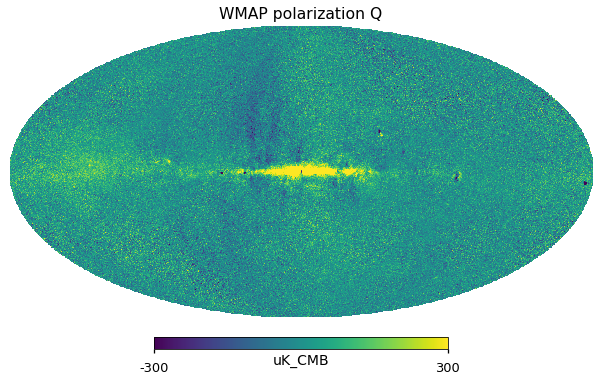

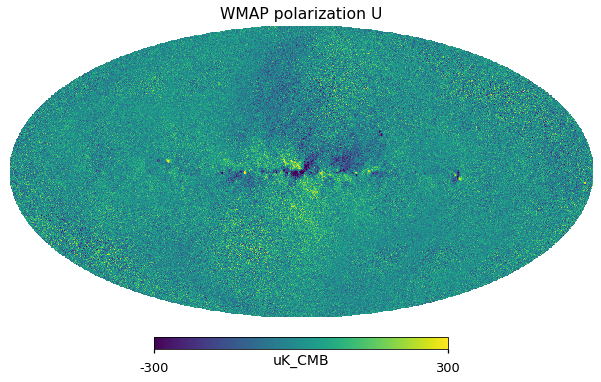

In [54]:
for i_pol, pol in [(1, "Q"), (2, "U")]:
    hp.mollview(wmap_23GHz_map[i_pol].to_value("uK_CMB"), title="WMAP polarization " + pol, unit="uK_CMB", min=-300, max=300)

In [55]:
target_unit = u.uK_RJ

In [56]:
K_CMB_2_K_RJ = (1 * wmap_23GHz_map.unit).to_value(target_unit , equivalencies=u.cmb_equivalencies(23*u.GHz))

In [57]:
K_CMB_2_K_RJ

986.4426641608574

This is the effective frequency of the WMAP K band using the effective frequency calculator from <https://lambda.gsfc.nasa.gov/product/map/current/effective_freq.cfm> using a spectral index of -3:

In [58]:
(1 * u.K_CMB).to(u.K_RJ , equivalencies=u.cmb_equivalencies(2.24357e+01*u.GHz))

<Quantity 0.98709465 K_RJ>

In [59]:
smoothing_fwhm = 3 * u.deg

In [60]:
ell_star_synch = 36

In [61]:
#synch_amplitude = hp.smoothing(wmap_23GHz_map.value, fwhm=(180 * u.deg / ell_star_synch).to_value(u.rad)) * wmap_23GHz_map.unit

In [65]:
synch_amplitude = wmap_23GHz_map

In [130]:
wmap_23GHz_frequency = 2.24357e+01*u.GHz

In [131]:
synch_amplitude = synch_amplitude.to(target_unit, equivalencies=u.cmb_equivalencies(wmap_23GHz_frequency))

In [67]:
#synch_amplitude *= K_CMB_2_K_RJ

In [68]:
#synch_amplitude <<= target_unit

In [113]:
synch_amplitude[0] = 1 * u.uK_RJ

## Angular power spectrum with PolSpice

We use PolSpice to estimate the power spectrum of the masked map,
compared to `anafast`, PolSpice properly deconvolves the mask to remove the
correlations between different $C_\ell$ caused by the mask.

We don't need to deconvolve the beam, we won't be using the values at high $\ell$ anyway.

In [70]:
from ispice import ispice

In [71]:
import time

In [72]:
def run_spice(input_map, mask_filename="total_mask.fits"):
    binpath=!which spice
    binpath= str(binpath[-1])
    hp.write_map("polspice_input.fits", input_map, overwrite=True)
    ispice("polspice_input.fits", "spice_cl.fits", binpath=binpath,
           subdipole=True,
       polarization=True, pixelfile=False, pixelfile2=False, decouple=False, subav=False, maskfile1=mask_filename)
    assert time.time() - os.path.getmtime("spice_cl.fits") < 10, "Spice possibly crashed, the output file is more than 10 seconds old"
    return hp.read_cl("spice_cl.fits")

In [73]:
spice_cl = run_spice(synch_amplitude)

Submitting job 0
/global/homes/z/zonca/condajupynersc/bin/spice -apodizesigma NO -apodizetype 0 -beam NO -beam2 NO -clfile spice_cl.fits -decouple NO -mapfile polspice_input.fits -fits_out YES -maskfile total_mask.fits -nlmax -1 -normfac 1.0 -npairsthreshold 0.00000 -overwrite YES -polarization YES -pixelfile NO -pixelfile2 NO -subav NO -subdipole YES -symmetric_cl NO -thetamax NO -tolerance NO -verbosity 2 -weightpower 1.0 -weightpower2 1.0 -weightpowerp 1.0 -weightpowerp2 1.0 
 ===> HEALPIXDATA not defined, trying HEALPIX...
 ===> Using HEALPIXDATA=/global/homes/z/zonca/condajupynersc/Healpix_3.70/data/
 Check header for file polspice_input.fits
 nside for input map file =         512
 Check header for file total_mask.fits
 nside for input map file =         512

 SpICE 3.7.0_DP has been called with the following attributes : 

 nside detected...          512
 max multipole used        1535
 polarization..... YES
 map file (1)......
     1.000 *   polspice_input.fits
 mask file....(T

In [74]:
spice_cl.shape

(6, 1536)

In [75]:
ell = np.arange(spice_cl.shape[1])
cl_norm = ell*(ell+1)/np.pi/2

We plot the output power spectrum and also identify a range in $\ell$ before white noise starts dominating
and after the uncertainty at low-$\ell$.

The power spectrum features a power law behaviour $\ell < 200$ (linear in `loglog` axes), then white noise
starts picking up until $\ell=1000$ and then we see the smoothing applied to the maps (10 arcminutes).

In [85]:
ell_fit_low = 10
ell_fit_high = 36

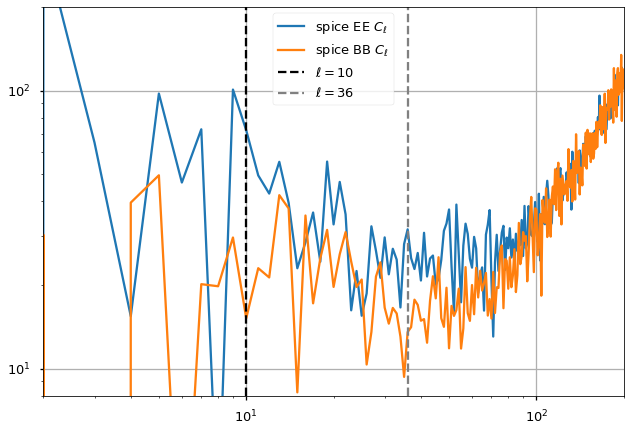

In [86]:
plt.loglog(cl_norm * spice_cl[1], label="spice EE $C_\ell$")
plt.loglog(cl_norm * spice_cl[2], label="spice BB $C_\ell$")
plt.axvline(ell_fit_low, linestyle="--", color="black", label="$ \ell={} $".format(ell_fit_low))
plt.axvline(ell_fit_high, linestyle="--", color="gray", label="$ \ell={} $".format(ell_fit_high))
plt.legend()
plt.xlim(2,200)
plt.ylim(8,200)
plt.grid();

In [87]:
from scipy.optimize import curve_fit

In [88]:
def model(ell, A, gamma):
    return A * ell ** gamma

In [89]:
xdata = np.arange(ell_fit_low, ell_fit_high)

/global/homes/z/zonca/condajupynersc/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/global/homes/z/zonca/condajupynersc/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


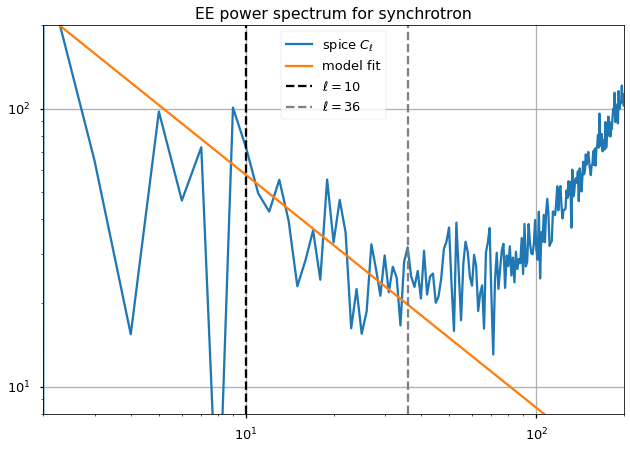

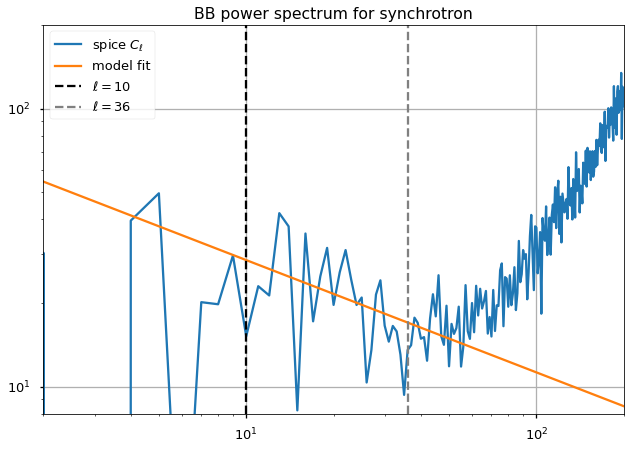

In [90]:
A_fit, gamma_fit, A_fit_std, gamma_fit_std = {},{},{},{}
for pol,i_pol in [("EE",1),("BB",2)]:
    ydata = xdata*(xdata+1)/np.pi/2 * spice_cl[i_pol][xdata]
    (A_fit[pol], gamma_fit[pol]), cov = curve_fit(model, xdata, ydata)

    A_fit_std[pol], gamma_fit_std[pol] = np.sqrt(np.diag(cov))
    plt.figure()
    plt.loglog(ell*(ell+1)/np.pi/2 * spice_cl[i_pol], label="spice $C_\ell$")

    plt.loglog(A_fit[pol]*ell**gamma_fit[pol], label="model fit")
    plt.axvline(ell_fit_low, linestyle="--", color="black", label="$ \ell={} $".format(ell_fit_low))
    plt.axvline(ell_fit_high, linestyle="--", color="gray", label="$ \ell={} $".format(ell_fit_high))
    plt.legend()
    plt.grid()
    plt.title(f"{pol} power spectrum for synchrotron")
    plt.xlim(2,200)
    plt.ylim(8,200)
    #plt.ylim(1, 30);

In [91]:
A_fit, A_fit_std

({'EE': 396.14492317881144, 'BB': 72.2748285718449},
 {'EE': 170.19496863734972, 'BB': 41.776059366263404})

In [92]:
gamma_fit

{'EE': -0.8369072159253504, 'BB': -0.4038144936099185}

In [93]:
gamma_fit_std

{'EE': 0.15130329481518956, 'BB': 0.19508727458974093}

Here is the first problem, the paper mentions a $\gamma^{EE,synch} = -.66$ and a $\gamma^{BB,synch} = -.62$. Here instead the BB spectrum is very flatter, while EE is steeper.


In [97]:
gamma_fit

{'EE': -0.8369072159253504,
 'BB': -0.4038144936099185,
 'TT': -0.8599160507773139}

### Window function

The window function is used to smooth the input templates to remove the high $\ell$ noise and its inverse is used for the added small scales.

$\ell_*^{synch}$

In [99]:
ell_star = 36

In [100]:
theta_fwhm_deg = 180/ell_star

In [101]:
theta_fwhm_deg

5.0

In [115]:
theta_fwhm = np.radians(theta_fwhm_deg)

In [116]:
w_ell = hp.gauss_beam(fwhm=theta_fwhm, lmax=lmax)

In [117]:
w_ell.shape

(1536,)

## Process patches

This process doesn't have a large impact on the output spectra, the idea is that in each $N_{side}=2$ pixel we want to scale the gaussian fluctuations so that they are consistent with the power at low ell.
So we will have higher gaussian fluctuations on the galaxy where there is stronger dust emission.

In [118]:
patch_indices = hp.ud_grade(np.arange(hp.nside2npix(2)), nside)

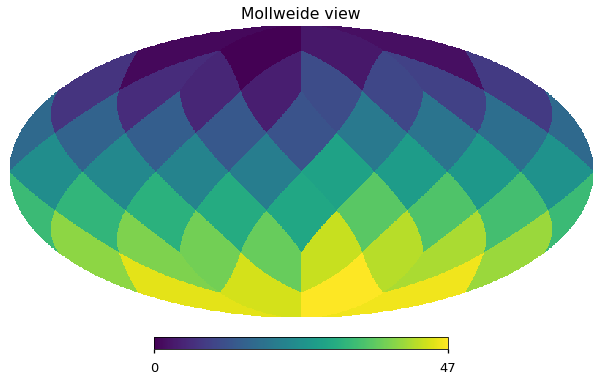

In [119]:
hp.mollview(patch_indices)

In [120]:
zeros = np.zeros(len(ell), dtype=np.double)

In [121]:
inv_w_ell = 1 - w_ell**2

In [122]:
nside_patches = 2
n_patches = hp.nside2npix(nside_patches)

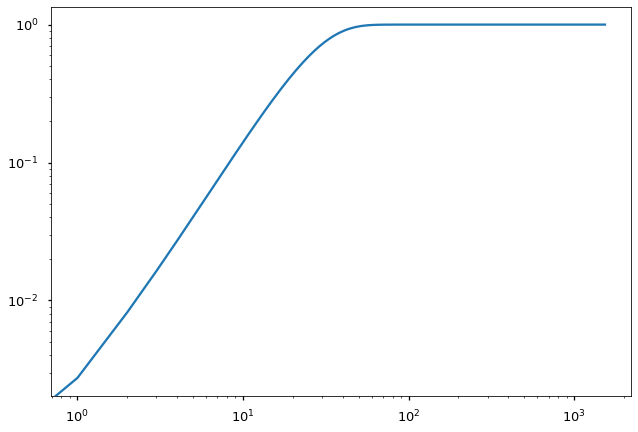

In [123]:
plt.loglog(inv_w_ell)

In [124]:
m_sigma_G = hp.synfast([
    zeros,
    A_fit["EE"] * ell**gamma_fit["EE"] * inv_w_ell / cl_norm,A_fit["BB"] * ell**gamma_fit["BB"] * inv_w_ell / cl_norm,
    zeros, zeros, zeros], nside, new=True)

/global/homes/z/zonca/condajupynersc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/z/zonca/condajupynersc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
N = {i_pol:np.zeros(n_patches, dtype=np.double) for i_pol in [1,2]}

In [128]:
synch_amplitude[0] = 0

<Quantity [[  1.        ,   1.        ,   1.        , ...,   1.        ,
              1.        ,   1.        ],
           [ 97.47742334, 104.35137944,  18.78683917, ...,  -0.59905139,
             -2.11980455,  47.60432421],
           [138.38055431,   5.93589878,  71.46178058, ..., 110.93938802,
             69.87251805,  32.20336084]] uK_RJ>

In [139]:
synch_amplitude[1:] = wmap_23GHz_map[1:].to(u.uK_RJ, equivalencies=u.cmb_equivalencies(wmap_23GHz_frequency))

In [140]:
m_planck_smoothed = hp.alm2map(hp.smoothalm(hp.map2alm(synch_amplitude.value, use_pixel_weights=True), fwhm=theta_fwhm),
                               nside=nside)

In [141]:
for i_patch in range(n_patches):
    print(i_patch)
    m_patch = np.zeros_like(m_planck_smoothed)
    m_patch[1:, patch_indices == i_patch] = m_planck_smoothed[1:, patch_indices == i_patch]
    cl_patch = hp.anafast(m_patch, lmax=2*ell_star, use_pixel_weights=True)
    for pol,i_pol in [("EE", 1),("BB",2)]:
        N[i_pol][i_patch] = np.sqrt(cl_patch[i_pol][ell_star] / n_patches / (A_fit[pol] * ell_star ** gamma_fit[pol]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


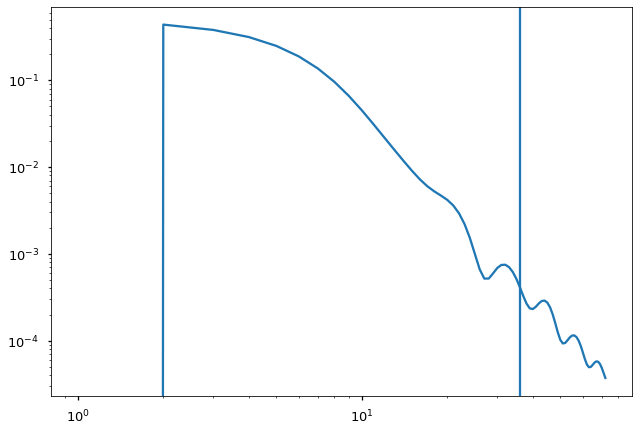

In [143]:
plt.loglog(cl_patch[1])
plt.axvline(ell_star)

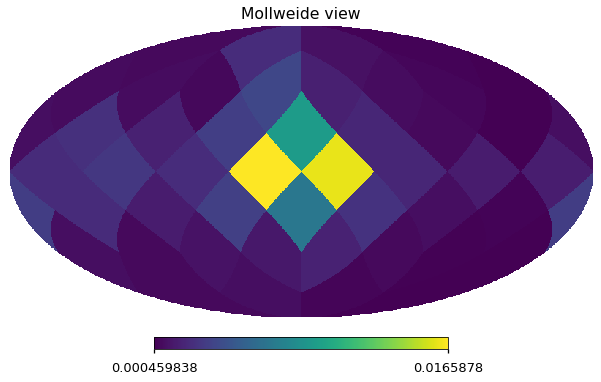

In [144]:
hp.mollview(N[1])

In [145]:
m_zeros = np.zeros(hp.nside2npix(nside), dtype=np.double)

In [146]:
N_smoothed = hp.smoothing([m_zeros, hp.ud_grade(N[1], nside), hp.ud_grade(N[2], nside)], fwhm=np.radians(10))

In [147]:
N_smoothed[1] /= N_smoothed[1].mean()

In [148]:
N_smoothed[2] /= N_smoothed[2].mean() 

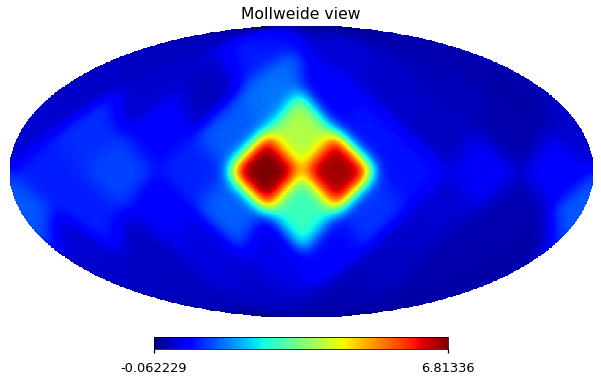

In [149]:
hp.mollview(N_smoothed[1], cmap="jet")

This also is quite different from Figure 9 in the paper, but it is not the main issue, possibly I need to use PolSpice instead of anafast?

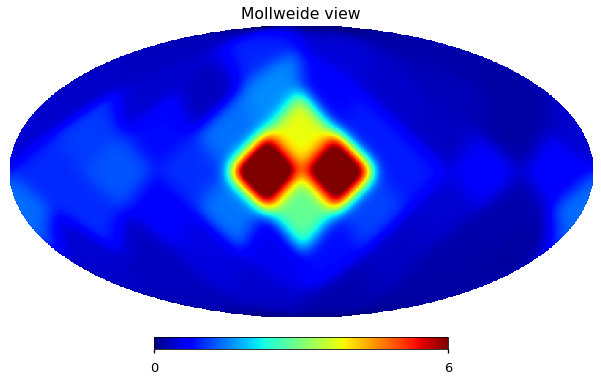

In [150]:
hp.mollview(N_smoothed[1], min=0, max=6, cmap="jet")

## Run PolSpice on the total map and just on the small scales

Always using the same Gal80 Planck mask

In [151]:
m_total = m_planck_smoothed + m_sigma_G * N_smoothed

In [152]:
m_total[0] = 1

In [153]:
cl_total = run_spice(m_total)

Submitting job 0
/global/homes/z/zonca/condajupynersc/bin/spice -apodizesigma NO -apodizetype 0 -beam NO -beam2 NO -clfile spice_cl.fits -decouple NO -mapfile polspice_input.fits -fits_out YES -maskfile total_mask.fits -nlmax -1 -normfac 1.0 -npairsthreshold 0.00000 -overwrite YES -polarization YES -pixelfile NO -pixelfile2 NO -subav NO -subdipole YES -symmetric_cl NO -thetamax NO -tolerance NO -verbosity 2 -weightpower 1.0 -weightpower2 1.0 -weightpowerp 1.0 -weightpowerp2 1.0 
 ===> HEALPIXDATA not defined, trying HEALPIX...
 ===> Using HEALPIXDATA=/global/homes/z/zonca/condajupynersc/Healpix_3.70/data/
 Check header for file polspice_input.fits
 nside for input map file =         512
 Check header for file total_mask.fits
 nside for input map file =         512

 SpICE 3.7.0_DP has been called with the following attributes : 

 nside detected...          512
 max multipole used        1535
 polarization..... YES
 map file (1)......
     1.000 *   polspice_input.fits
 mask file....(T

In [154]:
m_sigma_G[0]=1

In [155]:
N_smoothed[0]=1

In [156]:
cl_sigma_G_normalized = run_spice(m_sigma_G * N_smoothed)

Submitting job 0
/global/homes/z/zonca/condajupynersc/bin/spice -apodizesigma NO -apodizetype 0 -beam NO -beam2 NO -clfile spice_cl.fits -decouple NO -mapfile polspice_input.fits -fits_out YES -maskfile total_mask.fits -nlmax -1 -normfac 1.0 -npairsthreshold 0.00000 -overwrite YES -polarization YES -pixelfile NO -pixelfile2 NO -subav NO -subdipole YES -symmetric_cl NO -thetamax NO -tolerance NO -verbosity 2 -weightpower 1.0 -weightpower2 1.0 -weightpowerp 1.0 -weightpowerp2 1.0 
 ===> HEALPIXDATA not defined, trying HEALPIX...
 ===> Using HEALPIXDATA=/global/homes/z/zonca/condajupynersc/Healpix_3.70/data/
 Check header for file polspice_input.fits
 nside for input map file =         512
 Check header for file total_mask.fits
 nside for input map file =         512

 SpICE 3.7.0_DP has been called with the following attributes : 

 nside detected...          512
 max multipole used        1535
 polarization..... YES
 map file (1)......
     1.000 *   polspice_input.fits
 mask file....(T

## Download PySM 2 templates

In [157]:
for comp in "qu":
    filename = f"synch_{comp}_new.fits"
    if not os.path.exists(filename):
        !wget https://portal.nersc.gov/project/cmb/pysm-data/pysm_2/$filename

ModuleCmd_Switch.c(179):ERROR:152: Module 'PrgEnv-intel' is currently not loaded
--2020-12-14 16:47:28--  https://portal.nersc.gov/project/cmb/pysm-data/pysm_2/synch_q_new.fits
Resolving portal.nersc.gov (portal.nersc.gov)... 128.55.206.26, 128.55.206.24
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.206.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12591360 (12M)
Saving to: ‘synch_q_new.fits’

synch_q_new.fits    100%[===================>]  12.01M  19.4MB/s    in 0.6s    

2020-12-14 16:47:29 (19.4 MB/s) - ‘synch_q_new.fits’ saved [12591360/12591360]

ModuleCmd_Switch.c(179):ERROR:152: Module 'PrgEnv-intel' is currently not loaded
--2020-12-14 16:47:30--  https://portal.nersc.gov/project/cmb/pysm-data/pysm_2/synch_u_new.fits
Resolving portal.nersc.gov (portal.nersc.gov)... 128.55.206.26, 128.55.206.24
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.206.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1259136

In [172]:
m_pysm2 = np.array([np.ones(hp.nside2npix(nside))] + [hp.read_map(f"synch_{comp}_new.fits") for comp in "qu"])

In [173]:
cl_pysm2 = run_spice(m_pysm2)

Submitting job 0
/global/homes/z/zonca/condajupynersc/bin/spice -apodizesigma NO -apodizetype 0 -beam NO -beam2 NO -clfile spice_cl.fits -decouple NO -mapfile polspice_input.fits -fits_out YES -maskfile total_mask.fits -nlmax -1 -normfac 1.0 -npairsthreshold 0.00000 -overwrite YES -polarization YES -pixelfile NO -pixelfile2 NO -subav NO -subdipole YES -symmetric_cl NO -thetamax NO -tolerance NO -verbosity 2 -weightpower 1.0 -weightpower2 1.0 -weightpowerp 1.0 -weightpowerp2 1.0 
 ===> HEALPIXDATA not defined, trying HEALPIX...
 ===> Using HEALPIXDATA=/global/homes/z/zonca/condajupynersc/Healpix_3.70/data/
 Check header for file polspice_input.fits
 nside for input map file =         512
 Check header for file total_mask.fits
 nside for input map file =         512

 SpICE 3.7.0_DP has been called with the following attributes : 

 nside detected...          512
 max multipole used        1535
 polarization..... YES
 map file (1)......
     1.000 *   polspice_input.fits
 mask file....(T

## Compare PySM 2, the input and the output

/global/homes/z/zonca/condajupynersc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/global/homes/z/zonca/condajupynersc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':


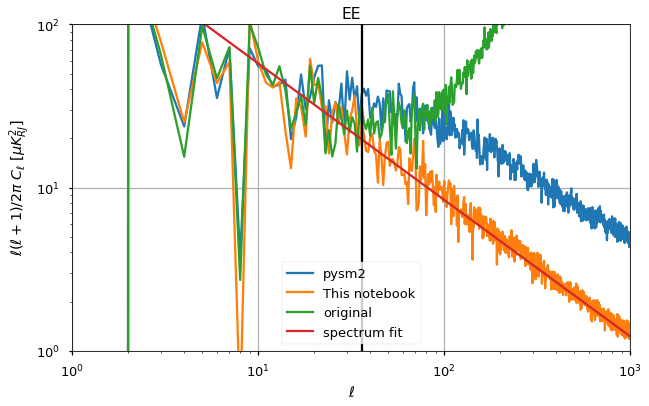

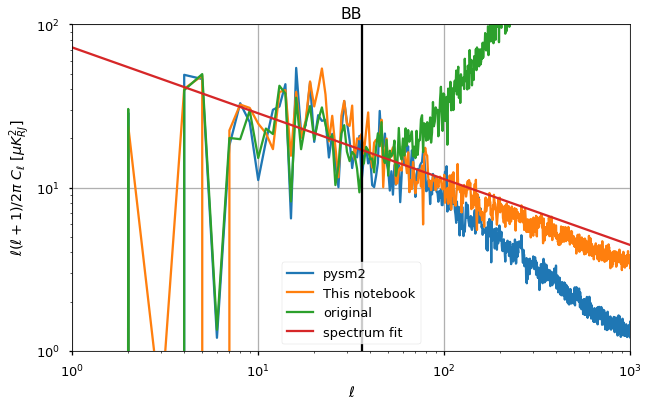

In [179]:
for pol, i_pol in [("EE",1),("BB",2)]:
    plt.figure(figsize=(10,6))
    plt.loglog(cl_norm[:cl_pysm2.shape[1]]*cl_pysm2[i_pol], label="pysm2")
    #plt.loglog(cl_norm*cl_sigma_G_normalized[i_pol], label="SS")
    plt.loglog(cl_norm*cl_total[i_pol], label="This notebook")

    plt.loglog(cl_norm*spice_cl[i_pol], label="original")

    plt.loglog(A_fit[pol] * ell**gamma_fit[pol], label="spectrum fit")
    plt.axvline(ell_star, color="black")
    plt.title(pol)
    plt.legend()
    plt.xlim([1,1000])
    plt.ylim([1e0, 1e2])
    plt.xlabel("$\ell$")
    plt.ylabel("$\ell(\ell+1)/2\pi~C_\ell~[\mu K_{RJ}^2]$")
    plt.grid();

We can also compare with the dust BB plot (Figure 7) from the PySM 2 paper below,
the main issue is the shape of the BB Spectrum.

![BB synch PySM 2 Paper](./BB_synch_PySM_2_paper.png)

# 